In [7]:

import importlib
import ifimage_tools
importlib.reload(ifimage_tools)
import pandas as pd
import warnings
import pickle

import os
import numpy as np
from stardist.matching import matching
image_dir = "/home/liy121/ifimage/Reorgnized Ground Truth"
dataset = ifimage_tools.IfImageDataset(image_dir, "/home/liy121/ifimage/merged_mask", {})
dataset.load_data()
old_version_sample_ids = ["6390", "8408", "8406", "8405v2", "8405", "8407"]
for sample_id in old_version_sample_ids:
    if sample_id in dataset.samples:
        del dataset.samples[sample_id]

In [8]:
# Assume `dataset` is an instance of YourDatasetClass
df_nuc   = dataset.evaluate_nuclei()
df_cells = dataset.evaluate_cell()

# Quick peek
print(df_nuc.head())
print(df_cells.head())

nuclei eval:   8%|▊         | 8/100 [00:30<05:30,  3.59s/it]

matching() error [15972/cyto/0.5]: y_true ((1024, 1388)) and y_pred ((1040, 1388)) have different shapes
matching() error [15972/cyto/0.55]: y_true ((1024, 1388)) and y_pred ((1040, 1388)) have different shapes
matching() error [15972/cyto/0.6000000000000001]: y_true ((1024, 1388)) and y_pred ((1040, 1388)) have different shapes
matching() error [15972/cyto/0.6500000000000001]: y_true ((1024, 1388)) and y_pred ((1040, 1388)) have different shapes
matching() error [15972/cyto/0.7000000000000002]: y_true ((1024, 1388)) and y_pred ((1040, 1388)) have different shapes
matching() error [15972/cyto/0.7500000000000002]: y_true ((1024, 1388)) and y_pred ((1040, 1388)) have different shapes
matching() error [15972/cyto/0.8000000000000003]: y_true ((1024, 1388)) and y_pred ((1040, 1388)) have different shapes
matching() error [15972/cyto/0.8500000000000003]: y_true ((1024, 1388)) and y_pred ((1040, 1388)) have different shapes
matching() error [15972/cyto/0.9000000000000004]: y_true ((1024, 1388

nuclei eval:  39%|███▉      | 39/100 [02:18<03:38,  3.58s/it]

Sample 8550 lacks GT nuclei; skipping…
Sample 8917 lacks GT nuclei; skipping…
Sample 5191 lacks GT nuclei; skipping…
Sample 6833 lacks GT nuclei; skipping…
Sample 10166 lacks GT nuclei; skipping…
Sample 9106 lacks GT nuclei; skipping…
Sample 4642 lacks GT nuclei; skipping…
Sample 5792 lacks GT nuclei; skipping…
Sample 10061 lacks GT nuclei; skipping…
Sample 1110 lacks GT nuclei; skipping…
Sample 7925 lacks GT nuclei; skipping…
Sample 5863 lacks GT nuclei; skipping…
Sample 1112 lacks GT nuclei; skipping…
Sample 7739 lacks GT nuclei; skipping…
Sample 5059 lacks GT nuclei; skipping…
Sample 7113 lacks GT nuclei; skipping…
Sample 3569 lacks GT nuclei; skipping…
Sample 7685 lacks GT nuclei; skipping…
Sample 8224 lacks GT nuclei; skipping…
Sample 4515 lacks GT nuclei; skipping…
Sample 7870 lacks GT nuclei; skipping…
Sample 6790 lacks GT nuclei; skipping…
Sample 7962 lacks GT nuclei; skipping…
Sample 1111 lacks GT nuclei; skipping…
Sample 8746 lacks GT nuclei; skipping…
Sample 3532 lacks GT nu

nuclei eval: 100%|██████████| 100/100 [02:22<00:00,  1.43s/it]


Sample 6523 lacks GT nuclei; skipping…
Sample 6466 lacks GT nuclei; skipping…
Sample 4683 lacks GT nuclei; skipping…
Sample 4319 lacks GT nuclei; skipping…
Sample 1109 lacks GT nuclei; skipping…


cell eval: 100%|██████████| 100/100 [00:00<00:00, 39587.58it/s]

[5803] no cell mask for 'cellpose'; skip
[5803] no cell mask for 'watershed'; skip
[5803] no cell mask for 'cell_expansion'; skip
[5803] no cell mask for 'watershed_only_cyto'; skip
[5803] no cell mask for 'cellpose2chan'; skip
[12781] no cell mask for 'cellpose'; skip
[12781] no cell mask for 'watershed'; skip
[12781] no cell mask for 'cell_expansion'; skip
[12781] no cell mask for 'watershed_only_cyto'; skip
[12781] no cell mask for 'cellpose2chan'; skip
[12779] no cell mask for 'cellpose'; skip
[12779] no cell mask for 'watershed'; skip
[12779] no cell mask for 'cell_expansion'; skip
[12779] no cell mask for 'watershed_only_cyto'; skip
[12779] no cell mask for 'cellpose2chan'; skip
[12786] no cell mask for 'cellpose'; skip
[12786] no cell mask for 'watershed'; skip
[12786] no cell mask for 'cell_expansion'; skip
[12786] no cell mask for 'watershed_only_cyto'; skip
[12786] no cell mask for 'cellpose2chan'; skip
[10594] no cell mask for 'cellpose'; skip
[10594] no cell mask for 'water

In [13]:
import matplotlib.pyplot as plt
def plot_precision_iou(df,
                       legend_mapping=None,
                       ax=None,
                       title="Mean Precision vs. IoU Threshold"):
    """
    Parameters
    ----------
    df : pd.DataFrame
        Must have columns ['method', 'iou', 'precision'].
    legend_mapping : dict or None
        Optional pretty-name mapping for each method.
    ax : matplotlib.axes.Axes or None
        Where to draw.  If None, a new figure is created.
    """
    if ax is None:
        plt.figure(figsize=(6, 4))
        ax = plt.gca()

    legend_mapping = legend_mapping or {}           # fall-back to identity

    for method, sub in df.groupby("method"):
        # sub already holds *mean precision* per IoU (because evaluate_nuclei
        # aggregated across samples).  Ensure it's sorted by IoU:
        sub = sub.sort_values("iou")

        # mAP = mean over IoU thresholds
        mAP = sub["precision"].mean()

        label = f"{legend_mapping.get(method, method)} (mAP={mAP:.2f})"
        ax.plot(sub["iou"], sub["precision"],
                marker="o", linestyle="-", label=label)

    ax.set(title=title,
           xlabel="IoU Threshold",
           ylabel="Mean Precision")
    ax.legend()
    plt.tight_layout()
    return ax

<Axes: title={'center': 'Mean Precision vs. IoU Threshold'}, xlabel='IoU Threshold', ylabel='Mean Precision'>

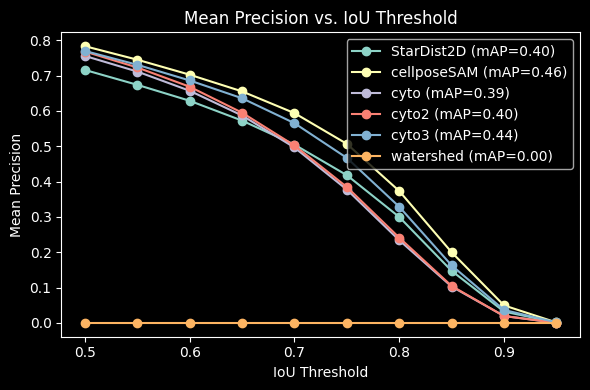

In [14]:
plot_precision_iou(df_nuc)